In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
def _get_LEAP_txt_file():
    path = 'BBQ_IMP.txt'
    file_dir = 'C:/Users/tong.wang/OneDrive - 國立台灣大學/桌面/Matlab tools/python/BBQ_IMP.txt'
    with open(path, 'r', encoding='UTF-8', errors='ignore') as file: #, encoding='UTF-8'
        headers = file.readlines()[:11]

#         title = file_dir[file_dir.rfind('/')+1:file_dir.rfind('.')]
        title="LEAP"
        curve = headers[4]
        curve = curve[curve.find('=')+1:curve.find(':')]


        cols = headers[-1]
        cols = cols.strip().split(" ")
        cols = [x for x in cols if x][2:-1]
        cols[0] = 'Frequency'
        cols[1] = curve
        data = pd.read_csv(path,  skiprows=11)
        data = data.iloc[:, :-1]
        print(data)
        data.columns = cols
    return title, data

_get_LEAP_txt_file()

      +2.000000E+001   +1.802200E+000
0            20.3493           1.8043
1            20.7046           1.8065
2            21.0662           1.8088
3            21.4341           1.8111
4            21.8084           1.8136
..               ...              ...
394       18661.9000           4.8526
395       18987.8000           4.9278
396       19319.3000           5.0044
397       19656.7000           5.0826
398       20000.0000           5.1622

[399 rows x 2 columns]


('LEAP',
       Frequency  Impedance_PR
 0       20.3493        1.8043
 1       20.7046        1.8065
 2       21.0662        1.8088
 3       21.4341        1.8111
 4       21.8084        1.8136
 ..          ...           ...
 394  18661.9000        4.8526
 395  18987.8000        4.9278
 396  19319.3000        5.0044
 397  19656.7000        5.0826
 398  20000.0000        5.1622
 
 [399 rows x 2 columns])

In [171]:
def _get_AP_txt_file():
    path = 'BBQ_Impedance_one.csv'

    with open(path, 'r', encoding='UTF-8', errors='ignore') as file: #, encoding='UTF-8'
        headers = file.readlines()[:4]

        headers
        cols = headers[1]
        cols = cols.strip().split(",")
        cols = [x for x in cols if x]
        cols.insert(0, 'Frequency')
        cols

        data = pd.read_csv(path,  skiprows=5)
        data = data.dropna()
        data = data.iloc[:, [i%2==1 or i==0 for i in range(len(data.columns))]]

        data.columns = cols
        for col in data.columns:
            data[col] = data[col].transform(pd.to_numeric, errors='coerce').round(decimals=2)
        title = headers[0]
        title = title[:title.find(',')].strip('""')
        title="AP"
        
    return title, data

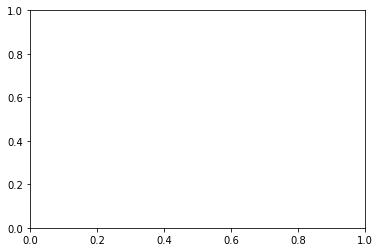

In [289]:
dataDict = {}
fig, _ = plt.subplots()
myPlotDict = {'main': fig.axes[0]}

{'main': <AxesSubplot:>, 'LEAP': <AxesSubplot:>}


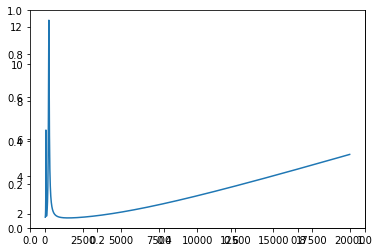

In [290]:
title_LEAP, data_LEAP = _get_LEAP_txt_file()
dataDict[title_LEAP] = data_LEAP

fig.add_subplot(111)

myPlotDict[title_LEAP] = fig.axes[len(fig.axes)-1]

myPlotDict[title_LEAP].plot(data_LEAP['Frequency'], data_LEAP.iloc[:,1], label='LEAP')

# for col in data_LEAP.columns[1:2]:
#     myPlotDict[title_LEAP].plot(data_LEAP['Frequency'], data_LEAP[col], label=col)
#     fig.axes[1].plot(data_LEAP['Frequency'], data_LEAP[col], label=col)

print(myPlotDict)
fig

{'main': <AxesSubplot:>, 'LEAP': <AxesSubplot:>, 'AP': <AxesSubplot:>}


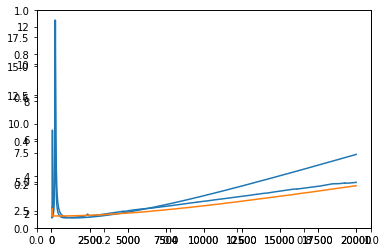

In [291]:
title_AP, data_AP = _get_AP_txt_file()
dataDict[title_AP] = data_AP
fig.add_subplot(111)
myPlotDict[title_AP] = fig.axes[len(fig.axes)-1]
fig.axes[2].patch.set_alpha(0.0)

for col in data_AP.columns[1:]:
    myPlotDict[title_AP].plot(data_AP['Frequency'], data_AP[col], label=col)


print(myPlotDict)
fig

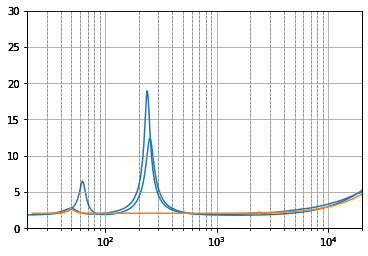

In [292]:
x_lim = [20,20000]
y_lim = [0, 30]

for key in myPlotDict.keys():
    ax = myPlotDict[key]
    ax.set_xscale('log')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.grid()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig

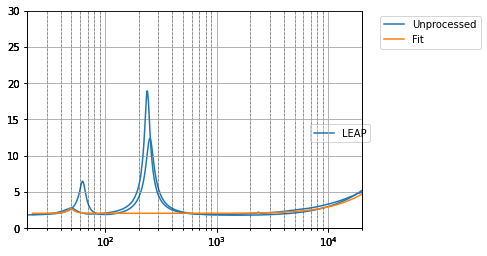

In [262]:
myPlotDict['AP'].legend(bbox_to_anchor=(1.04,1), loc="upper left")
myPlotDict['LEAP'].legend(bbox_to_anchor=(1.04,0.5), loc="upper right")
fig

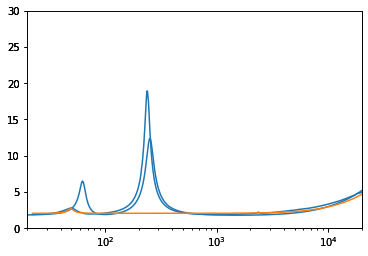

In [187]:
myPlotDict['AP'].get_xaxis().set_visible(False)
myPlotDict['AP'].get_yaxis().set_visible(True)
fig
# myPlotDict

In [217]:
lines_1, labels_1 = myPlotDict['LEAP'].get_legend_handles_labels()
lines_2, labels_2 = myPlotDict['AP'].get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

myPlotDict['main'].legend(lines, labels, bbox_to_anchor=(1.04,1), loc="upper left")

In [230]:
myPlotDict['main'].get_legend().remove()

In [287]:
myPlotDict['AP'].get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

[<matplotlib.lines.Line2D object at 0x0000018168D7CF48>, <matplotlib.lines.Line2D object at 0x0000018167601688>, <matplotlib.lines.Line2D object at 0x0000018167604548>] ['LEAP', 'Unprocessed', 'Fit']


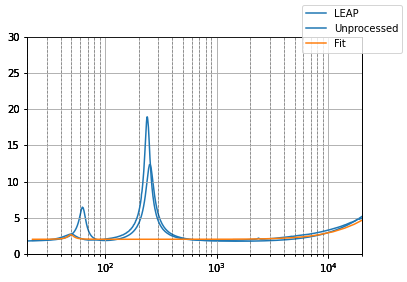

In [293]:
lines = []
labels = []

for key in myPlotDict.keys():
    ax = myPlotDict[key]
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)

print(lines, labels)

fig.legend(lines, labels, loc="upper right")
fig

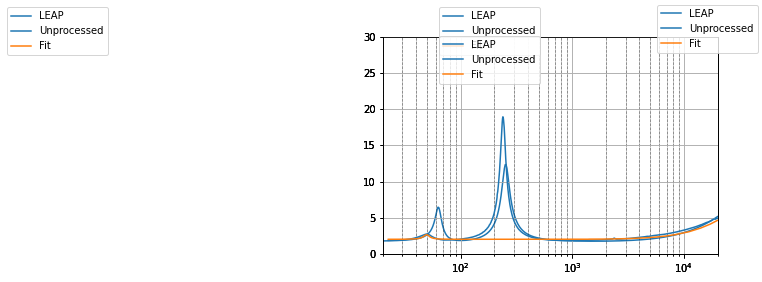

In [298]:
fig.legend(lines, labels, bbox_to_anchor=(0.5,0.9), loc="upper right")
fig